In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import missingno as msno

In [2]:
try:
    df_train = pd.read_csv('train.csv')
    df_test = pd.read_csv('test.csv')
    print("Let's go..................")
except:
    print('No such dataset...........')

Let's go..................


In [3]:
# first 5 rows of train dataset
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# first 5 rows of test dataset
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
# combining both datasets
df =df_train.append(
    df_test
)

C:\Users\ACT\AppData\Local\Temp\ipykernel_10112\3261244654.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df =df_train.append(


In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
# check shape
df.shape

(783667, 12)

In [8]:
# statistical information of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.0,7.0,14.0,20.0
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506e+00,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,1.266860e+01,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [9]:
# check datatypes of all the columns -> 

df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [10]:
df.drop(
    columns=['User_ID','Product_ID'], inplace=True
)

In [11]:
df.sample(n=3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
308919,F,18-25,2,A,0,0,13,16.0,NaN,555.0
144561,M,36-45,1,A,1,0,18,NaN,NaN,NaN
187878,M,26-35,4,A,1,1,3,4.0,12.0,NaN


In [12]:
# check the count of features/ non-null values in each column ->

df.count()

Gender                        783667
Age                           783667
Occupation                    783667
City_Category                 783667
Stay_In_Current_City_Years    783667
Marital_Status                783667
Product_Category_1            783667
Product_Category_2            537685
Product_Category_3            237858
Purchase                      550068
dtype: int64

In [13]:
# Let's replace the empty strings with NaN values

df = df.replace(' ', np.nan)

In [14]:
# Let's replace the question marks (?) with NaN values

df = df.replace('?', np.nan)

In [15]:
# Let's replace the question marks (.) with NaN values

df = df.replace('.', np.nan)

In [16]:
# determine the number of unique categories in each variable: The output of the preceding code shows the number of distinct categories per variable, that is, the cardinality:

df.nunique()

Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [17]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Cardinality')

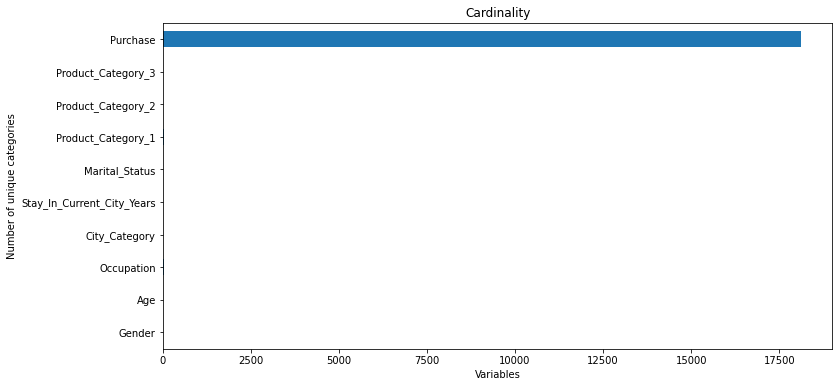

In [20]:
# plot the cardinality:

df.nunique().plot.barh(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [18]:
# display categorical features/columns -> 

categorical_columns = df.select_dtypes(include=[np.object0]).columns

categorical_columns

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years'], dtype='object')

In [19]:
# display numerical features/columns -> 

numerical_columns = df.select_dtypes(include=[np.number]).columns

numerical_columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [20]:
# check for duplicate rows in the dataset -> 

df.duplicated().sum()

147232

In [21]:
# if there are duplicated rows and columns, drop/delete them -> 

df.drop_duplicates(inplace=True)

In [22]:
# check for duplicate rows in the dataset -> 

df.duplicated().sum()

0

In [23]:
# check missing values -> 

df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            181320
Product_Category_3            426657
Purchase                       91628
dtype: int64

In [24]:
# print names or check all columns which have null values -> 

[val for val in df.columns if df[val].isnull().sum() > 0]

['Product_Category_2', 'Product_Category_3', 'Purchase']

In [25]:
# print the percentage of missing values -> 

mask = df.isnull()

total = mask.sum()

percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',keys=['count_missing', 'percentage_missing (%)'])

missing_data.sort_values(by='percentage_missing (%)', ascending=False,inplace=True)

missing_data

,count_missing,percentage_missing (%)
Product_Category_3,426657,67.038582
Product_Category_2,181320,28.489948
Purchase,91628,14.397071
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000


In [26]:
# print the nullable columns -> 

nullable_columns = df.columns[mask.any()].tolist()

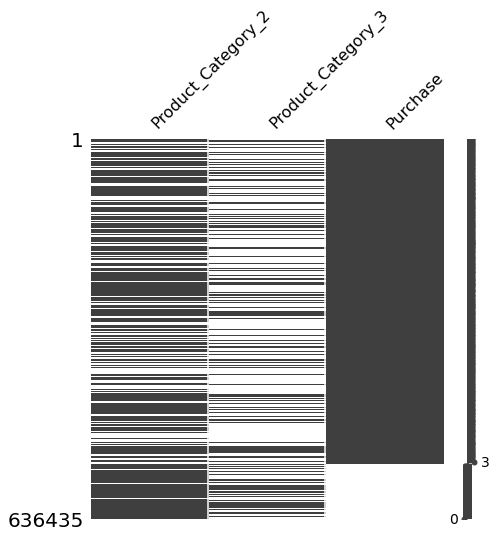

In [27]:
# use `seaborn` libraries to plot the matrix and heatmap of nullable columns

msno.matrix(df[nullable_columns], figsize=(7,7))

plt.show()

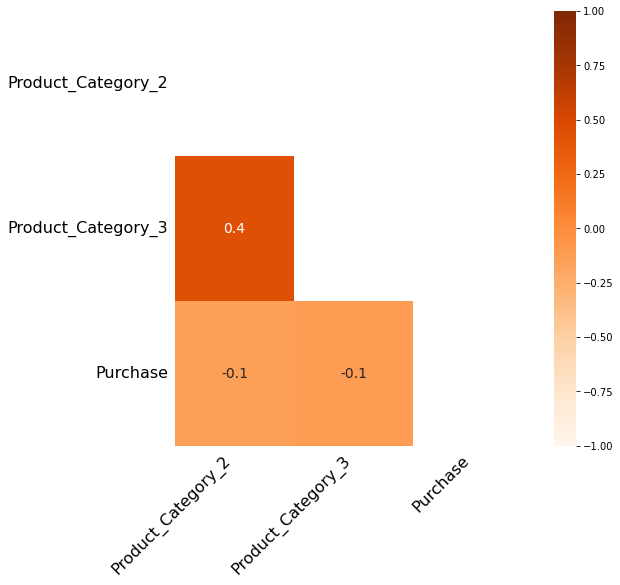

In [28]:
msno.heatmap(df[nullable_columns], figsize=(8,8), cmap='Oranges')
plt.show()

<AxesSubplot:>

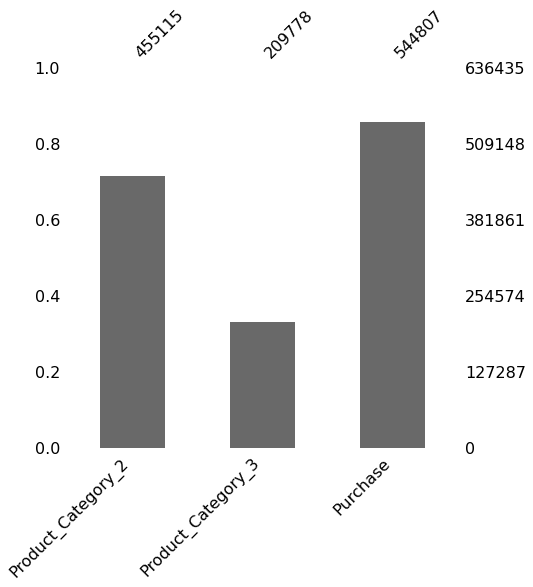

In [29]:
msno.bar(df[nullable_columns], figsize=(7,7))

In [30]:
# If the numerical column is skewed, we use median.
# Product_Category_2

df['Product_Category_2'].fillna((df['Product_Category_2'].median()), inplace=True)

In [31]:
# for Product_Category_3

df['Product_Category_3'].fillna((df['Product_Category_3'].median()), inplace=True)

In [32]:
# If the numerical column is not skewed, we use mean.
df['Purchase'].fillna((df['Purchase'].mean()), inplace=True)

In [33]:
# confirm there are no null values
df.isna().sum().sum()

0

=======

`Exploratory Data Analysis`

In [34]:
df.sample(n=3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
199015,M,18-25,0,C,1,0,9,15.0,14.0,23360.0
515636,F,0-17,10,A,1,0,5,9.0,14.0,6948.0
33284,F,36-45,16,C,1,0,8,16.0,14.0,6069.0


In [35]:
df.Gender.nunique()

2

In [36]:
gender = df.Gender.value_counts().reset_index()
gender.rename(columns={'index': 'Gender', 'Gender':'Count Per Gender'}, inplace=True)
gender

,Gender,Count Per Gender
0,M,476462
1,F,159973


In [56]:
fig = px.pie(values= df.Gender.value_counts(), data_frame=df)
fig

In [45]:
fig = px.bar(df.Gender.value_counts(), color=['indigo','yellow'])
fig

========

In [57]:
df.sample(n=3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
369263,M,36-45,14,A,3,1,5,8.0,14.0,8883.0
260054,M,18-25,3,B,2,0,11,16.0,14.0,1611.0
68649,M,36-45,5,B,1,0,8,17.0,14.0,8079.0


In [58]:
df.Age.nunique()

7

In [63]:
Total_Age_Groups = df.Age.unique()
Total_Age_Groups

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [69]:
age = df.Age.value_counts().reset_index()
age.rename(columns={'index':'Age Groups', 'Age':'Total Amount of People Per Age Group'}, inplace=True)
age

,Age Groups,Total Amount of People Per Age Group
0,26-35,250393
1,36-45,128804
2,18-25,112991
3,46-50,54469
4,51-55,46239
5,55+,26170
6,0-17,17369


In [72]:
fig = px.bar(df.Age.value_counts(), color=['indigo','yellow','blue','green','red','black','violet'])
fig

In [73]:
fig = px.pie(values= df.Age.value_counts(), data_frame=df)
fig

======

In [74]:
df.sample(n=3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
16636,M,26-35,20,A,3,1,1,2.0,8.0,9285.379846
374209,M,26-35,12,B,0,1,5,15.0,18.0,7188.000000
85059,F,26-35,3,B,1,1,3,4.0,14.0,8017.000000


In [84]:
occupation = df.Occupation.value_counts().reset_index()
occupation.rename(columns={'index':'Type of Occupation', 'Occupation': 'Count of People per Occupation'}, inplace=True)
occupation

,Type of Occupation,Count of People per Occupation
0,4,79182
1,0,79161
2,7,67433
3,1,55630
4,17,46631
5,20,39073
6,12,36539
7,14,32159
8,2,31091
9,16,29930


In [87]:
fig = px.bar(df.Occupation.value_counts(), color=['indigo','yellow','blue','green','red','black','violet','indigo', 'yellow', 'blue', 'green', 'red', 'black',
                                                'yellow', 'yellow', 'green', 'black', 'red', 'violet', 'blue', 'darkgreen'])
fig

In [88]:
fig = px.pie(values= df.Occupation.value_counts(), data_frame=df)
fig

========

In [89]:
df.sample(n=3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233538,M,36-45,0,C,1,0,8,14.0,17.0,9747.0
235880,M,26-35,6,C,1,0,1,11.0,14.0,11562.0
27960,M,36-45,16,A,0,0,8,9.0,14.0,8099.0


In [90]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [98]:
city_category = df.City_Category.value_counts().reset_index()
city_category.rename(columns={'index':'City Category Type', 'City_Category':'Number of People Per City'}, inplace=True)
city_category

,City Category Type,Number of People Per City
0,B,264599
1,C,202955
2,A,168881


In [100]:
fig = px.bar(df.City_Category.value_counts(), color=['indigo','yellow','blue'])
fig

In [101]:
fig = px.pie(values= df.City_Category.value_counts(), data_frame=df)
fig

======

In [102]:
df.sample(n=3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
285502,M,36-45,17,A,1,0,5,9.0,14.0,3652.000000
96357,M,26-35,14,A,0,0,2,4.0,5.0,9285.379846
402053,M,26-35,2,B,1,0,8,9.0,14.0,9737.000000


In [103]:
df.Stay_In_Current_City_Years.nunique()

5

In [104]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [108]:
ss = df.Stay_In_Current_City_Years.value_counts().reset_index()
ss.rename(columns={'index':'Stay in Current City Year', 'Stay_In_Current_City_Years':'Number of People Per Year'}, inplace=True)
ss

,Stay in Current City Year,Number of People Per Year
0,1,220911
1,2,118677
2,3,111139
3,4+,98467
4,0,87241


In [109]:
fig = px.bar(df.Stay_In_Current_City_Years.value_counts(), color=['indigo','yellow','blue','red','green'])
fig

In [110]:
fig = px.pie(values= df.Stay_In_Current_City_Years.value_counts(), data_frame=df)
fig

=========

In [111]:
df.sample(n=3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
22235,M,36-45,5,C,2,1,3,5.0,14.0,8095.0
346618,M,26-35,0,C,0,0,1,6.0,8.0,19455.0
138246,M,18-25,4,A,0,0,10,9.0,14.0,23304.0


In [112]:
df.Marital_Status.nunique()

2

In [114]:
df.Marital_Status.unique()

array([0, 1], dtype=int64)

In [119]:
ms = df.Marital_Status.value_counts().reset_index()
ms.rename(columns={'index':'Marital Status', 'Marital_Status':'Count of People who are Married or Not Married'}, inplace=True)
ms

,Marital Status,Count of People who are Married or Not Married
0,0,372235
1,1,264200


In [116]:
fig = px.bar(df.Marital_Status.value_counts(), color=['indigo','yellow'])
fig

In [120]:
fig = px.pie(values= df.Marital_Status.value_counts(), data_frame=df)
fig

=============

In [121]:
df.sample(n=3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
463993,M,36-45,1,C,0,1,8,14.0,17.0,8105.000000
449571,F,51-55,6,B,3,0,1,9.0,14.0,15850.000000
76549,M,36-45,17,B,0,1,8,16.0,14.0,9285.379846


In [122]:
df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [124]:
pc1 = df.Product_Category_1.value_counts().reset_index()
pc1.rename(columns={'index': 'Product_Category_1', 'Product_Category_1':'Count of Products Per Category'}, inplace=True)
pc1

,Product_Category_1,Count of Products Per Category
0,1,168427
1,5,165367
2,8,123946
3,2,31788
4,11,27817
5,6,25888
6,3,24314
7,4,14955
8,16,11091
9,15,7927


In [126]:
fig = px.bar(df.Product_Category_1.value_counts(), color=['indigo','yellow','blue','green','red','black','violet','indigo', 'yellow', 'blue', 'green', 'red', 'black',
                                                'yellow', 'yellow', 'green', 'black', 'red', 'violet', 'blue',])
fig

In [127]:
fig = px.pie(values= df.Product_Category_1.value_counts(), data_frame=df)
fig

=============

In [128]:
df.sample(n=3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
332356,M,26-35,4,B,2,1,8,9.0,14.0,8107.000000
408446,M,36-45,14,A,3,1,1,2.0,16.0,15801.000000
88820,M,0-17,11,C,1,0,11,14.0,14.0,9285.379846


In [129]:
df.Product_Category_2.nunique()

17

In [130]:
df.Product_Category_2.unique()

array([ 9.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12., 10.,
       17., 13.,  7., 18.])

In [137]:
pc2 = df.Product_Category_2.value_counts().reset_index()
pc2.rename(columns={'index':'Product_Category_2',  'Product_Category_2': 'Count of People who Purchased Products in category 2'}, inplace=True)
pc2

,Product_Category_2,Count of People who Purchased Products in category 2
0,9.0,189015
1,8.0,75726
2,14.0,62972
3,2.0,58322
4,16.0,50384
5,15.0,45903
6,5.0,33516
7,4.0,31241
8,6.0,21297
9,11.0,17746


In [138]:
fig = px.bar(df.Product_Category_2.value_counts(), color=['indigo','yellow','blue','green','red','black','violet','indigo', 'yellow', 'blue', 'green', 'red', 'black',
                                                'yellow', 'yellow', 'green', 'black'])
fig

In [139]:
fig = px.pie(values= df.Product_Category_2.value_counts(), data_frame=df)
fig

========

In [140]:
df.sample(n=3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
540581,F,46-50,14,B,1,1,1,2.0,14.0,7999.000000
163710,M,26-35,7,A,4+,0,5,9.0,14.0,1787.000000
181442,F,46-50,1,C,0,1,5,11.0,12.0,9285.379846


In [141]:
df.Product_Category_3.nunique()

15

In [142]:
df.Product_Category_3.unique()

array([14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

In [146]:
pc3 = df.Product_Category_3.value_counts().reset_index()
pc3.rename(columns={'index':'Product_Category_3', 'Product_Category_3':'Count of People who bought Products in Category 3'}, inplace=True)
pc3

,Product_Category_3,Count of People who bought Products in Category 3
0,14.0,450152
1,16.0,41231
2,15.0,33696
3,17.0,21111
4,5.0,19618
5,8.0,16220
6,9.0,14754
7,12.0,11673
8,13.0,7443
9,18.0,6306


In [150]:
fig = px.bar(df.Product_Category_3.value_counts(), color=['indigo','yellow','blue','green','red','black','violet','indigo', 'yellow', 'blue', 'green',
                                                'yellow', 'blue', 'green', 'red'])
fig

In [151]:
fig = px.pie(values= df.Product_Category_3.value_counts(), data_frame=df)
fig

=========

In [152]:
df.sample(n=4)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
171304,M,26-35,0,B,0,1,2,9.0,15.0,9986.0
402723,M,51-55,7,B,1,0,6,16.0,14.0,16443.0
482600,F,18-25,4,B,2,0,8,14.0,14.0,9839.0
451487,M,55+,7,C,1,0,2,5.0,8.0,13235.0
